<a href="https://colab.research.google.com/github/lmei33/trial/blob/master/Employee_Attrition_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Employee Attrition Analysis

# Overview
Attrition, in Human Resource terminology, refers to the phenomenon of the employees leaving the company. Employee attrition is always the focus of Human Resource Management. This project aims to  predict employee attrition and identify influtial factors to reduce employee attrition. 

The original data is from IBM HR Analytics Employee Attrition & Performance:
https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

![EXIT](https://mk0at44uvaxh7f73.kinstacdn.com/wp-content/uploads/2017/12/Topic-1.png)



# Data Ingest

In [0]:
import pandas as pd

In [0]:
IBM_Attrition = pd.read_csv("https://raw.githubusercontent.com/lmei33/Discussion2/master/IBM_HR.csv")
IBM_Attrition = IBM_Attrition.drop(['DailyRate', 'EducationField','EmployeeCount','EmployeeNumber','HourlyRate','MonthlyRate','Over18','StandardHours','TotalWorkingYears','YearsWithCurrManager','YearsInCurrentRole','Department','JobRole','Education','PercentSalaryHike'], axis=1)
IBM_Attrition.head(3)

,Age,Attrition,BusinessTravel,DistanceFromHome,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,Yes,Travel_Rarely,1,2,Female,3,2,4,Single,5993,8,Yes,3,1,0,0,1,6,0
1,49,No,Travel_Frequently,8,3,Male,2,2,2,Married,5130,1,No,4,4,1,3,3,10,1
2,37,Yes,Travel_Rarely,2,4,Male,2,1,3,Single,2090,6,Yes,3,2,0,3,3,0,0


In [0]:
IBM_Attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DistanceFromHome',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion'],
      dtype='object')

In [0]:
#There is no NaN values in the dataset
print(pd.isnull(IBM_Attrition).sum())

Age                         0
Attrition                   0
BusinessTravel              0
DistanceFromHome            0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsSinceLastPromotion     0
dtype: int64


In [0]:
#mapping non-numeric values to numeric values
IBM_Attrition_Nu = IBM_Attrition.copy()
YN_mapping = {"Yes": 1, "No": 0}
IBM_Attrition_Nu['Attrition'] = IBM_Attrition_Nu['Attrition'].map(YN_mapping)
IBM_Attrition_Nu['OverTime'] = IBM_Attrition_Nu['OverTime'].map(YN_mapping)
BusinessTravel_mapping = {"Travel_Rarely": 0, "Travel_Frequently": 1, "Non-Travel": 0}
IBM_Attrition_Nu['BusinessTravel'] = IBM_Attrition_Nu['BusinessTravel'].map(BusinessTravel_mapping)
Gender_mapping = {"Female": 1, "Male": 0}
IBM_Attrition_Nu['Gender'] = IBM_Attrition_Nu['Gender'].map(Gender_mapping)
Marital_mapping = {"Married": 1, "Single": 0, "Divorced": 0}
IBM_Attrition_Nu['MaritalStatus'] = IBM_Attrition_Nu['MaritalStatus'].map(Marital_mapping)

IBM_Attrition_Nu.head(3)

,Age,Attrition,BusinessTravel,DistanceFromHome,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,1,0,1,2,1,3,2,4,0,5993,8,1,3,1,0,0,1,6,0
1,49,0,1,8,3,0,2,2,2,1,5130,1,0,4,4,1,3,3,10,1
2,37,1,0,2,4,0,2,1,3,0,2090,6,1,3,2,0,3,3,0,0


# EDA

In [0]:
!pip3 install seaborn==0.9.0
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


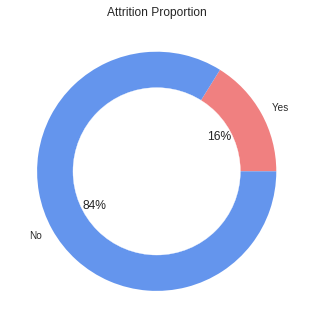

In [0]:
Y_count = len(IBM_Attrition[IBM_Attrition['Attrition'] == 'Yes'])
N_count = len(IBM_Attrition[IBM_Attrition['Attrition'] == 'No'])
# create data
names='Yes', 'No',
size=[Y_count,N_count]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['lightcoral','cornflowerblue'],autopct='%1.0f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
ax = plt.axes()
ax.set_title("Attrition Proportion")
plt.show()

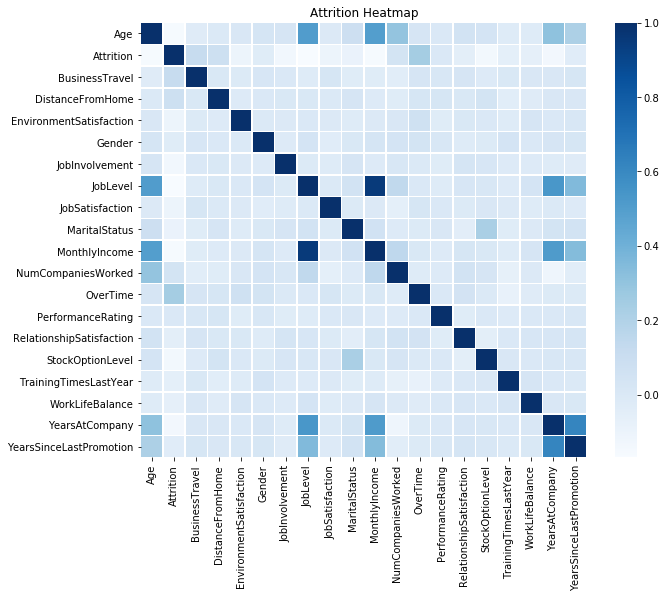

In [0]:
plt.subplots(figsize=(10,8))
ax = plt.axes()
ax.set_title("Attrition Heatmap")
corr = IBM_Attrition_Nu.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap="Blues",linewidths=.5)

## Objective Factors

In [0]:
Age_YAC_NCW = IBM_Attrition[['Age','YearsAtCompany','NumCompaniesWorked','Attrition']]
#Age_YAC_NCW.head()
AYN_melt = Age_YAC_NCW.melt(['Attrition'], var_name='cols',  value_name='vals')
#AYN_melt.head()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


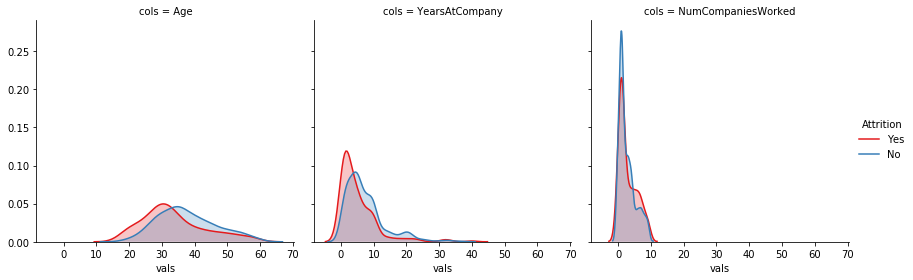

In [0]:
g = sns.FacetGrid(AYN_melt, col='cols', hue="Attrition", palette="Set1",size=4)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())
#Focus on the red area--distribution of Attrition
#Lots of attrition among the 'young' employees (for Age or for YearsAtCompany)-- not surprising -- trial to find a suit -- company culture.. 
#Those who have worked in more than 5 companies tend to attrit. -- The average time spent in every company is shorter -- HR insight..

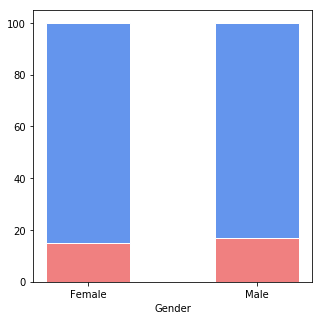

In [0]:
# Data
r = [0,1]
Y_F = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['Gender'] == 'Female')])
N_F = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['Gender'] == 'Female')])
Y_M = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['Gender'] == 'Male')])
N_M = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['Gender'] == 'Male')])
raw_data = {'greenBars': [Y_F, Y_M], 'orangeBars': [N_F, N_M]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
 
# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('Female','Male')
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("Gender")
 
# Show graphic
plt.show()

## Return and Bonus

In [0]:
Income = IBM_Attrition[['MonthlyIncome','Attrition']]
Income_melt = Income.melt(['Attrition'], var_name='cols',  value_name='vals')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


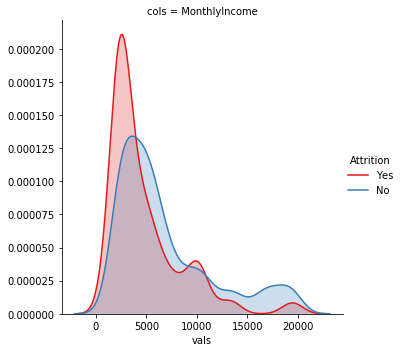

In [0]:
g = sns.FacetGrid(Income_melt, col='cols', hue="Attrition", palette="Set1",size=5)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())
#Employees with low income tend to attrit

![EXIT](https://pbs.twimg.com/media/DzeQad9UwAUq8yz.jpg)

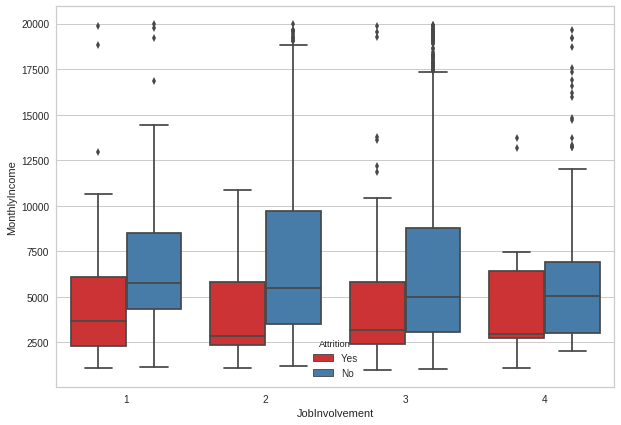

In [0]:
plt.figure(figsize=(10,7))
sns.boxplot(x="JobInvolvement", y="MonthlyIncome", hue="Attrition",
            data=IBM_Attrition, palette="Set1")
##Interesting Finding: Low income together with similar involvement is the reason behind attrition

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


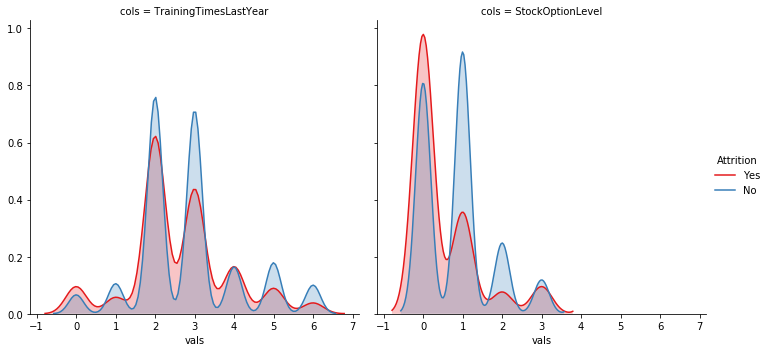

In [0]:
TS = IBM_Attrition[['TrainingTimesLastYear','StockOptionLevel','Attrition']]
#Age_YAC_NCW.head()
TS_melt = TS.melt(['Attrition'], var_name='cols',  value_name='vals')
#AYN_melt.head()
g = sns.FacetGrid(TS_melt, col='cols', hue="Attrition", palette="Set1",size=5)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())
#Employee pay attention to stock option -- when given option, work for the company may increase return.

## Satisfaction

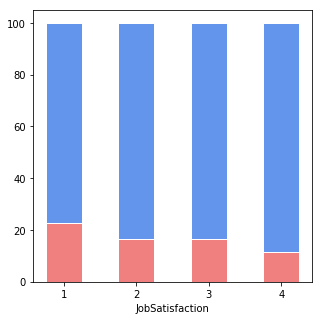

In [0]:
# Data
r = [0,1,2,3]
Y_J1 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['JobSatisfaction'] == 1)])
N_J1 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['JobSatisfaction'] == 1)])
Y_J2 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['JobSatisfaction'] == 2)])
N_J2 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['JobSatisfaction'] == 2)])
Y_J3 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['JobSatisfaction'] == 3)])
N_J3 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['JobSatisfaction'] == 3)])
Y_J4 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['JobSatisfaction'] == 4)])
N_J4 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['JobSatisfaction'] == 4)])
raw_data = {'greenBars': [Y_J1, Y_J2,Y_J3,Y_J4], 'orangeBars': [N_J1,N_J2,N_J3,N_J4]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
 
# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('1','2','3','4')
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("JobSatisfaction")
 
# Show graphic
plt.show()

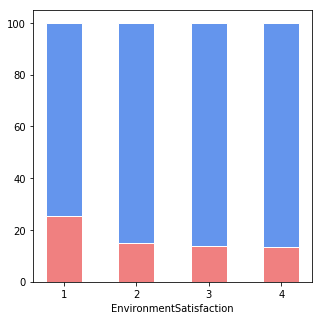

In [0]:
# Data
r = [0,1,2,3]
Y_J1 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['EnvironmentSatisfaction'] == 1)])
N_J1 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['EnvironmentSatisfaction'] == 1)])
Y_J2 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['EnvironmentSatisfaction'] == 2)])
N_J2 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['EnvironmentSatisfaction'] == 2)])
Y_J3 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['EnvironmentSatisfaction'] == 3)])
N_J3 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['EnvironmentSatisfaction'] == 3)])
Y_J4 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['EnvironmentSatisfaction'] == 4)])
N_J4 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['EnvironmentSatisfaction'] == 4)])
raw_data = {'greenBars': [Y_J1, Y_J2,Y_J3,Y_J4], 'orangeBars': [N_J1,N_J2,N_J3,N_J4]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
 
# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('1','2','3','4')
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("EnvironmentSatisfaction")
 
# Show graphic
plt.show()

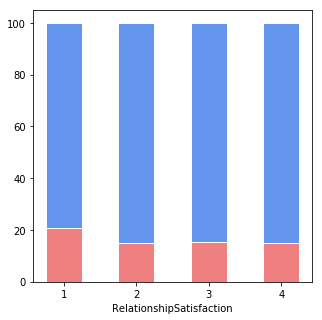

In [0]:
# Data
r = [0,1,2,3]
Y_J1 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['RelationshipSatisfaction'] == 1)])
N_J1 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['RelationshipSatisfaction'] == 1)])
Y_J2 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['RelationshipSatisfaction'] == 2)])
N_J2 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['RelationshipSatisfaction'] == 2)])
Y_J3 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['RelationshipSatisfaction'] == 3)])
N_J3 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['RelationshipSatisfaction'] == 3)])
Y_J4 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'Yes') & (IBM_Attrition['RelationshipSatisfaction'] == 4)])
N_J4 = len(IBM_Attrition[(IBM_Attrition['Attrition'] == 'No') & (IBM_Attrition['RelationshipSatisfaction'] == 4)])
raw_data = {'greenBars': [Y_J1, Y_J2,Y_J3,Y_J4], 'orangeBars': [N_J1,N_J2,N_J3,N_J4]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
 
# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('1','2','3','4')
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("RelationshipSatisfaction")
 
# Show graphic
plt.show()

# Model

In [0]:
from sklearn.model_selection import train_test_split

predictors = IBM_Attrition_Nu.drop(['Attrition'], axis=1)
target = IBM_Attrition_Nu["Attrition"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

87.35


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

84.26


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       271
           1       0.56      0.17      0.26        53

   micro avg       0.84      0.84      0.84       324
   macro avg       0.71      0.57      0.59       324
weighted avg       0.81      0.84      0.81       324



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


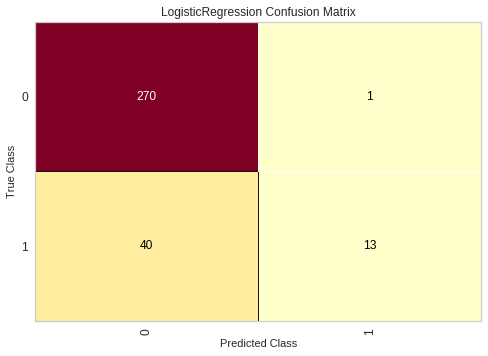

In [0]:
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(logreg, classes=[0,1])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(x_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(x_val, y_val)

# How did we do?
cm.poof()

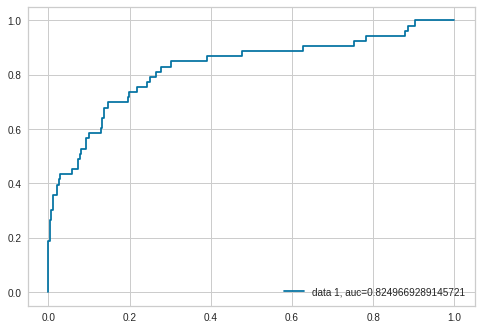

In [0]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
y_pred_proba = logreg.predict_proba(x_val)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_val,  y_pred_proba)
auc = metrics.roc_auc_score(y_val, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [0]:
import numpy as np
coef = np.squeeze(abs(logreg.coef_)).tolist()

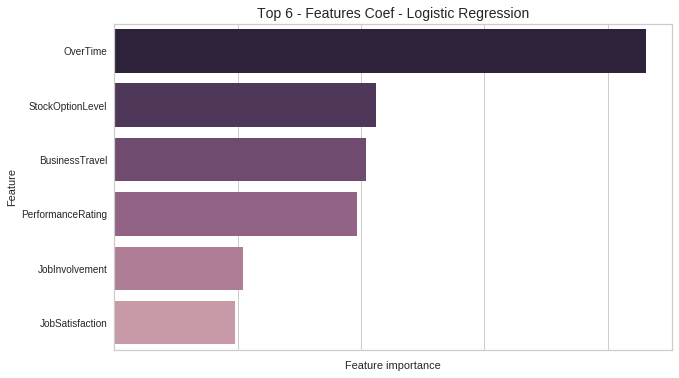

In [0]:
%matplotlib inline

tmp = pd.DataFrame({'Feature': list(x_train), 'Feature importance': coef})
tmp = tmp.sort_values(by='Feature importance',ascending=False).head(6)
plt.figure(figsize = (10,6))
plt.title('Top 6 - Features Coef - Logistic Regression',fontsize=14)
s = sns.barplot(y='Feature',x='Feature importance',data=tmp, orient='h',palette=sns.cubehelix_palette(8,reverse=True))
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

# Conclusion

### **Based on the influtial factors analysis **
Don't make them work overtime, they do care!

Communicate the vision 

Increase employee engagement, especially young employees

Enhance recognition and rewards programs - Stock option can be a good choice 

Create a pleasant workspace and increase satisfaction

###**Since the model still need improvement in predicting attrition... **

Stay interview...
e.g.
“What kind of feedback or recognition would you like about your performance that you aren’t currently receiving?”

Survey or interview with employees that decided to leave, identify the things employees care.
